<a href="https://colab.research.google.com/github/adityakuncara/Semester5-PVCK/blob/main/week09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#NAMA : ADITYA KUNCARA BAKTI
#NIM : 2041720231
#ABSEN : 04

#####1. load data

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

#####2. import library

In [2]:
# Load Data
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


#####3. Fungsi dilasi serta tampilkan hasil dilasi pada citra dengan Structuring Element Dilasi (SED) berbentuk cross 3 x 3 tanpa menggunakan library morphology dari openCV

In [31]:
image = cv2.imread('/content/drive/MyDrive/PINDAHAN ACER/PCVK/plat nomer.jpg', 0)  # 0 untuk membaca dalam skala abu-abu (grayscale)

# Buat Structuring Element Dilasi (SED) berbentuk square 5x5
sed = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))

# Fungsi dilasi
def dilation(image, sed):

    m, n = image.shape

    y, x = sed.shape

    y = y // 2

    x = x // 2

    dilated_image = np.zeros((m, n), dtype=np.uint8)

    for i in range(y, m - y):
        for j in range(x, n - x):
            dilated_image[i, j] = np.max(image[i - y:i + y + 1, j - x:j + x + 1] * sed)

    return dilated_image

# Terapkan dilasi ke gambar

Text(0.5, 1.0, 'Citra Hasil Dilasi')

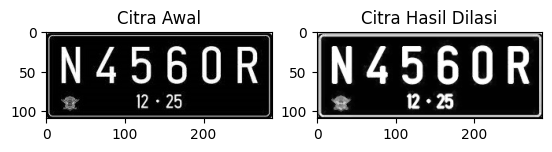

In [32]:
dilated_image = dilation(image, sed)

plt.subplot(1, 2, 1)  # Subplot pertama
plt.imshow(image,cmap = 'gray')
plt.title('Citra Awal')

plt.subplot(1, 2, 2)  # Subplot kedua
plt.imshow(dilated_image,cmap = 'gray')
plt.title('Citra Hasil Dilasi')

#####4. Implementasi operasi dilasi serta tampilkan hasil dilasi pada citra dengan Structuring Element Dilasi (SED) berbentuk cross 3 x 3 dengan menggunakan library morphology dari openCV

Text(0.5, 1.0, 'Dilatasi')

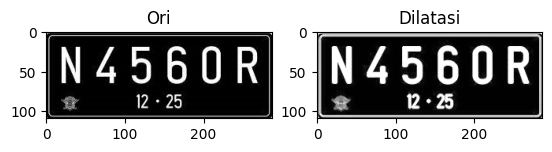

In [33]:
sed = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))

dilated_image = cv2.dilate(image, sed)

plt.subplot(1, 2, 1)  # Subplot pertama
plt.imshow(image,cmap = 'gray')
plt.title('Ori')

plt.subplot(1, 2, 2)  # Subplot kedua
plt.imshow(dilated_image,cmap = 'gray')
plt.title('Dilatasi')

#####5. Fungsi erosi serta tampilkan hasil erosi pada citra dengan Structuring Element Erosi (SE) berbentuk square 5 x 5 tanpa menggunakan library morphology dari openCV

In [34]:
se = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))

def erotion(image, se):

    m, n = image.shape

    y, x = se.shape

    y = y // 2

    x = x // 2

    eroded_image = np.zeros((m, n), dtype=np.uint8)

    for i in range(y, m - y):
        for j in range(x, n - x):
            eroded_image[i, j] = np.min(image[i - y:i + y + 1, j - x:j + x + 1] * se)

    return eroded_image

Text(0.5, 1.0, 'Citra Hasil Erosi')

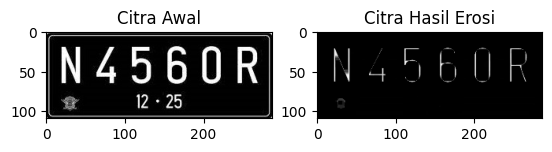

In [35]:
erotion_image = erotion(image, se)

plt.subplot(1, 2, 1)  # Subplot pertama
plt.imshow(image,cmap = 'gray')
plt.title('Citra Awal')

plt.subplot(1, 2, 2)  # Subplot kedua
plt.imshow(erotion_image,cmap = 'gray')
plt.title('Citra Hasil Erosi')

#####6. Implementasi operasi erosi serta tampilkan hasil erosi pada citra dengan Structuring Element Erosi (SE) berbentuk square 5 x 5 dengan menggunakan library morphology dari openCV

Text(0.5, 1.0, 'Citra Hasil Erosi')

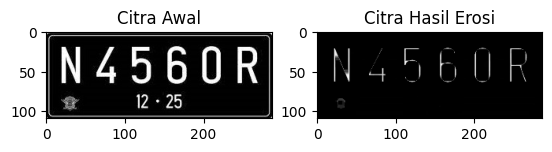

In [36]:
se = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))

erotion_image = cv2.erode(image, se)

plt.subplot(1, 2, 1)  # Subplot pertama
plt.imshow(image,cmap = 'gray')
plt.title('Citra Awal')

plt.subplot(1, 2, 2)  # Subplot kedua
plt.imshow(erotion_image,cmap = 'gray')
plt.title('Citra Hasil Erosi')


#####7. Program implementasi operasi opening dengan Structuring Element berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology dari openCV

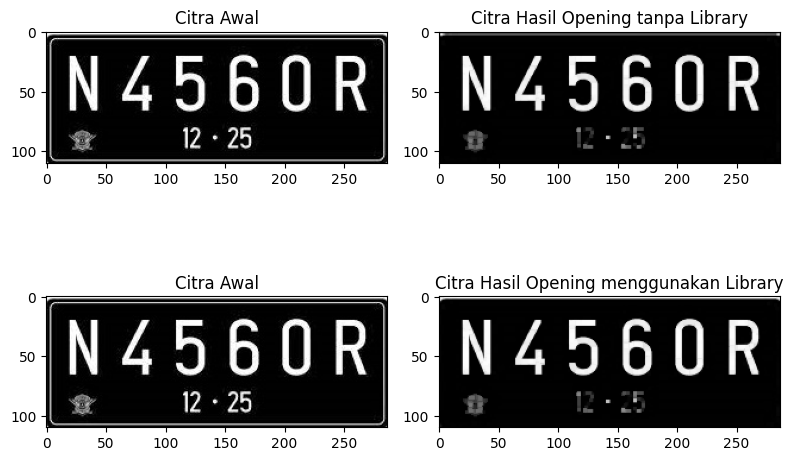

In [37]:
se = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))

# Operasi Erosi
eroded_image = erotion(image, se)

# Operasi Dilasi
opened_image = dilation(eroded_image, se)

opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, se)

# Tampilkan gambar asli dan hasil opening

fig, axs = plt.subplots(2, 2, figsize=(8, 6))

axs[0, 0].imshow(image, cmap = 'gray')
axs[0, 0].set_title('Citra Awal')

# Plot di baris pertama, kolom kedua
axs[0, 1].imshow(opened_image, cmap = 'gray')
axs[0, 1].set_title('Citra Hasil Opening tanpa Library')

# Plot di baris kedua, kolom pertama
axs[1, 0].imshow(image, cmap = 'gray')
axs[1, 0].set_title('Citra Awal')

# Plot di baris kedua, kolom kedua
axs[1, 1].imshow(opening, cmap = 'gray')
axs[1, 1].set_title('Citra Hasil Opening menggunakan Library')

# Menyesuaikan jarak antara plot
plt.tight_layout()

# Menampilkan plot
plt.show()


#####8. Buatlah program implementasi operasi closing dengan Structuring Element berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology dari openCV, sehingga menghasilkan tampilan seperti di bawah ini: operasi closing tanpa library morphology

Text(0.5, 1.0, 'Citra Hasil Closing menggunakan Library')

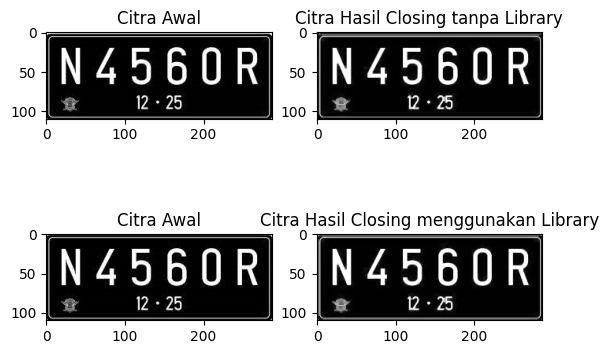

In [38]:
se = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))

# Operasi Dilasi
dilasi_image = dilation(image, se)

# Operasi Erosi
closing_image = erotion(dilasi_image, se)

closing = cv2.morphologyEx(image, cv2.MORPH_CLOSE, se)

# Tampilkan gambar asli dan hasil closing
plt.subplot(2, 2, 1)
plt.imshow(image,cmap = 'gray')
plt.title('Citra Awal')

plt.subplot(2, 2, 2)
plt.imshow(closing_image,cmap = 'gray')
plt.title('Citra Hasil Closing tanpa Library')

plt.subplot(2, 2, 3)
plt.imshow(image,cmap = 'gray')
plt.title('Citra Awal')

plt.subplot(2, 2, 4)
plt.imshow(closing,cmap = 'gray')
plt.title('Citra Hasil Closing menggunakan Library')

#####9.Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk Cross 3 x 3 dan 5 x 5, sehingga menghasilkan tampilan seperti di bawah ini

Text(0.5, 1.0, 'Citra Hasil Dilasi dengan SED cross 5x5')

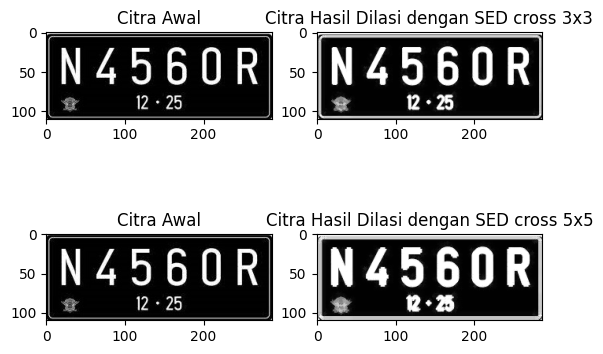

In [39]:
sed3x3 = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
sed5x5 = cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))

dilation3x3 = cv2.dilate(image,sed3x3)
dilation5x5 = cv2.dilate(image,sed5x5)

# Tampilkan gambar asli dan hasil dilasi
plt.subplot(2, 2, 1)
plt.imshow(image,cmap = 'gray')
plt.title('Citra Awal')

plt.subplot(2, 2, 2)
plt.imshow(dilation3x3,cmap = 'gray')
plt.title('Citra Hasil Dilasi dengan SED cross 3x3')

plt.subplot(2, 2, 3)
plt.imshow(image,cmap = 'gray')
plt.title('Citra Awal')

plt.subplot(2, 2, 4)
plt.imshow(dilation5x5,cmap = 'gray')
plt.title('Citra Hasil Dilasi dengan SED cross 5x5')

#####10. Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk Circular 3 x 3 dan 5 x 5, sehingga menghasilkan tampilan seperti di bawah ini:

Text(0.5, 1.0, 'Citra Hasil Dilasi dengan SED circular 5x5')

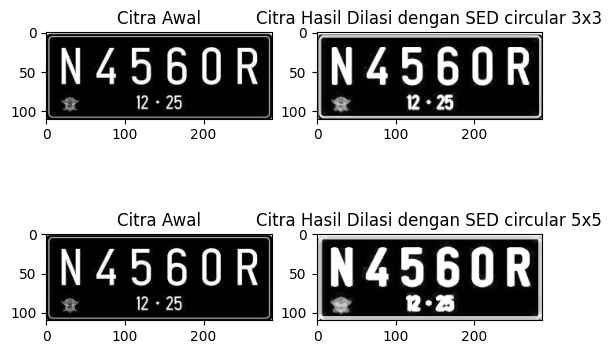

In [40]:
sed3x3 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
sed5x5 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))

dilation3x3 = cv2.dilate(image,sed3x3)
dilation5x5 = cv2.dilate(image,sed5x5)

# Tampilkan gambar asli dan hasil dilasi
plt.subplot(2, 2, 1)
plt.imshow(image,cmap = 'gray')
plt.title('Citra Awal')

plt.subplot(2, 2, 2)
plt.imshow(dilation3x3,cmap = 'gray')
plt.title('Citra Hasil Dilasi dengan SED circular 3x3')

plt.subplot(2, 2, 3)
plt.imshow(image,cmap = 'gray')
plt.title('Citra Awal')

plt.subplot(2, 2, 4)
plt.imshow(dilation5x5,cmap = 'gray')
plt.title('Citra Hasil Dilasi dengan SED circular 5x5')

#####11. Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk Rectangle 3 x 5 dan 5 x 7, sehingga menghasilkan tampilan seperti di bawah ini:

Text(0.5, 1.0, 'Citra Hasil Erosi dengan SE reactangle 5x5')

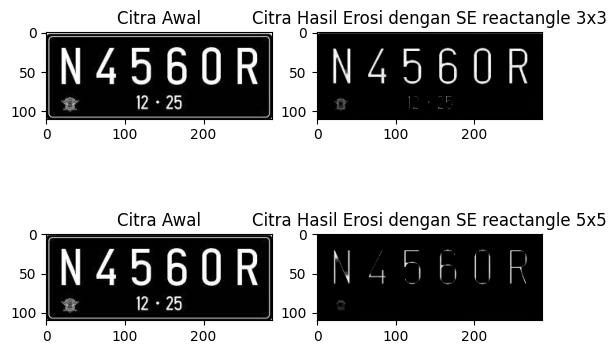

In [41]:
se3x3 = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
se5x5 = cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))

erotion3x3 = cv2.erode(image,se3x3)
erotion5x5 = cv2.erode(image,se5x5)

# Tampilkan gambar asli dan hasil dilasi
plt.subplot(2, 2, 1)
plt.imshow(image,cmap = 'gray')
plt.title('Citra Awal')

plt.subplot(2, 2, 2)
plt.imshow(erotion3x3,cmap = 'gray')
plt.title('Citra Hasil Erosi dengan SE reactangle 3x3')

plt.subplot(2, 2, 3)
plt.imshow(image,cmap = 'gray')
plt.title('Citra Awal')

plt.subplot(2, 2, 4)
plt.imshow(erotion5x5,cmap = 'gray')
plt.title('Citra Hasil Erosi dengan SE reactangle 5x5')

#####12. Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk Line Vertikal 3 dan 5, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar j.png)

Text(0.5, 1.0, 'Citra Hasil Erosi dengan SE line bertikal 5')

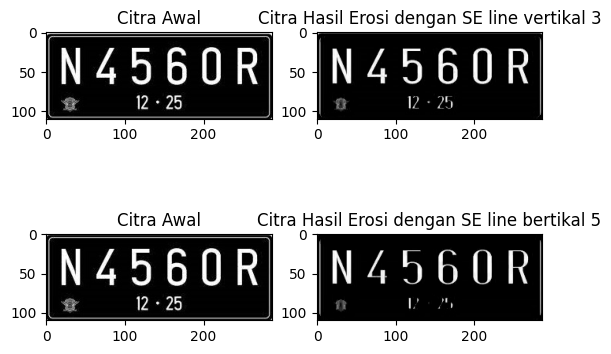

In [42]:
se3 = np.array([[1],
                [1],
                [1]], dtype=np.uint8)
se5 = np.array([[1],
                [1],
                [1],
                [1],
                [1]], dtype=np.uint8)

erotion3 = cv2.erode(image,se3)
erotion5 = cv2.erode(image,se5)

# Tampilkan gambar asli dan hasil dilasi
plt.subplot(2, 2, 1)
plt.imshow(image,cmap = 'gray')
plt.title('Citra Awal')

plt.subplot(2, 2, 2)
plt.imshow(erotion3,cmap = 'gray')
plt.title('Citra Hasil Erosi dengan SE line vertikal 3')

plt.subplot(2, 2, 3)
plt.imshow(image,cmap = 'gray')
plt.title('Citra Awal')

plt.subplot(2, 2, 4)
plt.imshow(erotion5,cmap = 'gray')
plt.title('Citra Hasil Erosi dengan SE line bertikal 5')

#####13. tophat

Text(0.5, 1.0, 'Citra Hasil Top Hat')

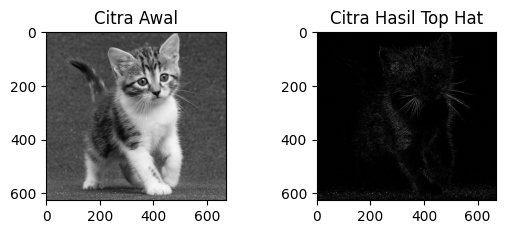

In [44]:
filterSize =(3, 3)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT,filterSize)

# Reading the image named 'input.jpg'
kucing = cv2.imread('/content/drive/MyDrive/PINDAHAN ACER/PCVK/kitten01.jpg', cv2.COLOR_BGR2GRAY)
kucing = cv2.cvtColor(kucing, cv2.COLOR_BGR2GRAY)

# Applying the Top-Hat operation
tophat_img = cv2.morphologyEx(kucing, cv2.MORPH_TOPHAT, kernel)

plt.subplot(2, 2, 1)  # Subplot pertama
plt.imshow(kucing,cmap = 'gray')
plt.title('Citra Awal')

plt.subplot(2, 2, 2)  # Subplot kedua
plt.imshow(tophat_img ,cmap = 'gray')
plt.title('Citra Hasil Top Hat')

#####14. blackhat

Text(0.5, 1.0, 'Citra Hasil Top Hat')

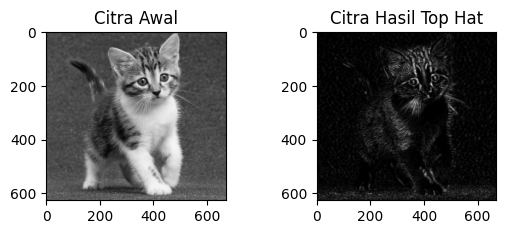

In [46]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (13,5))

# Reading the image named 'input.jpg'
kucing = cv2.imread('/content/drive/MyDrive/PINDAHAN ACER/PCVK/kitten01.jpg')
kucing = cv2.cvtColor(kucing, cv2.COLOR_BGR2GRAY)

# Applying the black-hat operation
blckhat_img = cv2.morphologyEx(kucing, cv2.MORPH_BLACKHAT, kernel)

plt.subplot(2, 2, 1)  # Subplot pertama
plt.imshow(kucing,cmap = 'gray')
plt.title('Citra Awal')

plt.subplot(2, 2, 2)  # Subplot kedua
plt.imshow(blckhat_img ,cmap = 'gray')
plt.title('Citra Hasil Top Hat')

#####15. skeleton

Text(0.5, 1.0, 'Skeleton')

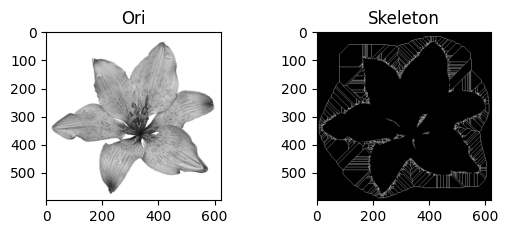

In [47]:
from skimage import filters
from skimage.morphology import skeletonize

# read image
img = cv2.imread('/content/drive/MyDrive/PINDAHAN ACER/PCVK/lily.jpg',0)

binary = img > filters.threshold_triangle(img)

# true false to one
binary_cp = binary.copy()

binary_cp[binary_cp == True] = 1

binary_cp[binary_cp == False] = 0

# skeletonize image

skeleton = skeletonize(binary_cp)

plt.subplot(2, 2, 1)  # Subplot pertama
plt.imshow(img,cmap = 'gray')
plt.title('Ori')

plt.subplot(2, 2, 2)  # Subplot kedua
plt.imshow(skeleton,cmap = 'gray')
plt.title('Skeleton')

#####16. skeleton inverse

Text(0.5, 1.0, 'Skeleton Invers')

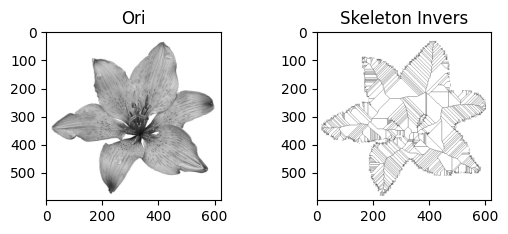

In [48]:
binary = img < filters.threshold_triangle(img)
# skeletonize image
skeleton = skeletonize(binary)

plt.subplot(2, 2, 1)  # Subplot pertama
plt.imshow(img,cmap = 'gray')
plt.title('Ori')

plt.subplot(2, 2, 2)  # Subplot kedua
plt.imshow(skeleton,cmap = 'gray_r')
plt.title('Skeleton Invers')


#####17. thickening

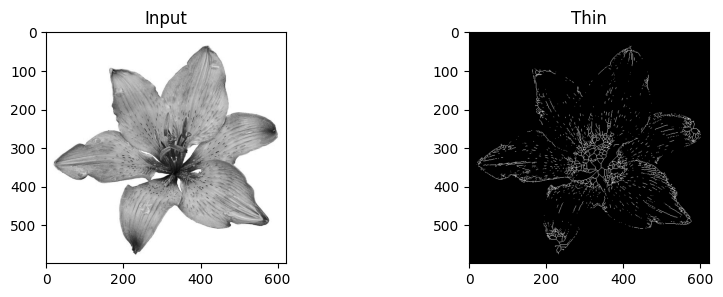

In [50]:
from skimage import img_as_float
from skimage import io, color, morphology
import matplotlib.pyplot as plt

image = img_as_float(color.rgb2gray(io.imread('/content/drive/MyDrive/PINDAHAN ACER/PCVK/lily.jpg')))

image_binary = image < 0.5

out_skeletonize = morphology.skeletonize(image_binary)

out_thin = morphology.thin(image_binary)

f, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 3))

ax0.imshow(image, cmap='gray')
ax0.set_title('Input')
ax1.imshow(out_thin, cmap='gray')
ax1.set_title('Thin')
plt.savefig('/tmp/char_out.png')
plt.show()

##PRAKTIKUM

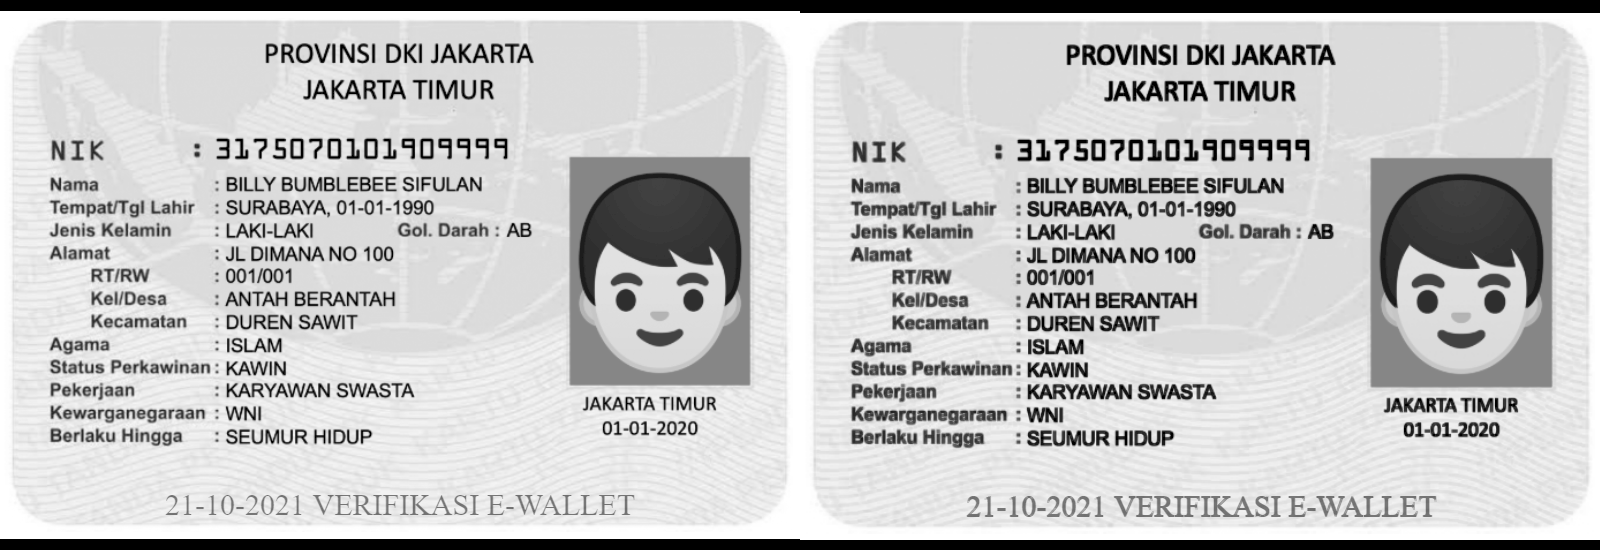

In [51]:
ktp = cv2.imread('/content/drive/MyDrive/PINDAHAN ACER/PCVK/watermark.png', 0)

# menggunakan kenel reactangle 2x2
se = cv2.getStructuringElement(cv2.MORPH_RECT,(2,2))

# dilakukan operasi opening
opening_image = cv2.morphologyEx(ktp, cv2.MORPH_OPEN, se)

# dilakuak operasi erosi
erosi_image = cv2.erode(opening_image, se)

final = cv2.hconcat([ktp, erosi_image])
cv2_imshow(final)
